In [1]:
# Homework 6 
# Michael Klein
# Worked with Trevor Smith and James Taylor
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib

# my modules
from ReadFile import read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterofMass2 import CenterOfMass

In [16]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    Inputs:
    galaxy: the name of the galaxy
    start: the number of the first snapshot to be read in
    end: the number of the last snapshot to be read in
    n: an integer indicating the intervals over which COM will be returned
    returns: 
    The orbits up to snapshot 800 (~800 Gyr), but will output values in intervals of n=5
    """
    # compose the filename for output
    fileout = "Orbit_"+galaxy+".txt"
    print(fileout)
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    if galaxy == 'M33':
        delta = 0.1
        VolDec = 4
    else:
        delta = 0.1
        VolDec = 2
        
    
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_IDs = np.arange(start, end, n)
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([len(snap_IDs), 7])
    
    for i, snap_ID in enumerate(snap_IDs):# loop over files
        
        # compose the data filename (be careful about the folder)
        ilbl = '000' + str(snap_ID)
        ilbl = ilbl[-3:]
        filename = "VLowRes/"+"%s_"%(galaxy) + ilbl + '.txt'
        
        
        
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename, 2)
        
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        orbitCOM_P = COM.COM_P(delta, VolDec)
        orbitCOM_V = COM.COM_V(*orbitCOM_P)
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        t = COM.time.value/1000
        orbitCOM_P = orbitCOM_P.value
        orbitCOM_V = orbitCOM_V.value
        orbit[i] = t,*tuple(orbitCOM_P),*tuple(orbitCOM_V)
        
        #print(snap_ID)
    
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    #np.savetxt(fileout, orbit, header='t x y z vx vy vz', comments='#', fmt=['%.2f', '%.2f','%.2f','%.2f','%.2f','%.2f','%.2f'])
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#', header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}".format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
    



In [17]:
OrbitCOM('M33',0,800,5)
OrbitCOM('MW',0,800,5)
OrbitCOM('M31',0,800,5)

Orbit_M33.txt
Orbit_MW.txt
Orbit_M31.txt


In [18]:
def Positions(galaxy):
    data = np.genfromtxt('Orbit_'+galaxy+'.txt', names=True)
    x = data['x']
    y = data['y']
    z = data['z']
    return np.array([x,y,z])


In [19]:
def Velocities(galaxy):
    data = np.genfromtxt('Orbit_'+galaxy+'.txt', names=True)
    vx = data['vx']
    vy = data['vy']
    vz = data['vz']
    return np.array([vx, vy, vz])

<function matplotlib.pyplot.show(*args, **kw)>

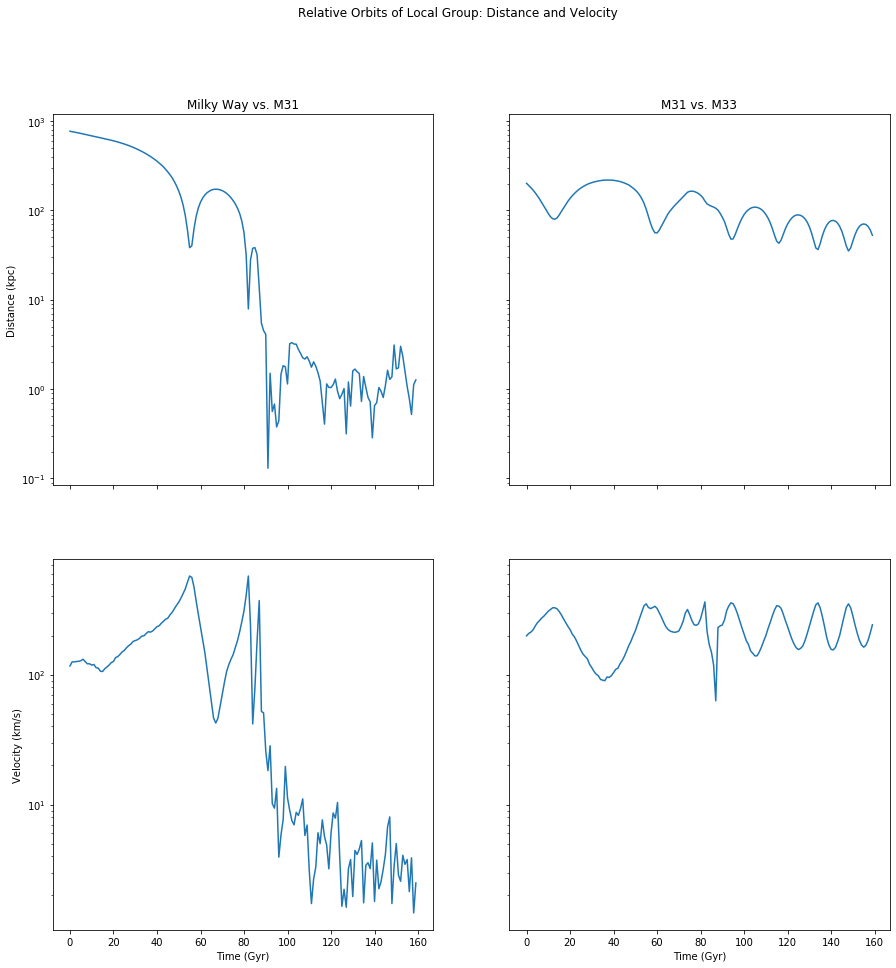

In [20]:
def VecDiff(V1, V2):
    
    return np.linalg.norm(V2-V1, axis =0)

# Determine the magnitude of the relative position and velocities 

# of MW and M31

MW_M31_dist = VecDiff(Positions('MW'),Positions('M31'))
MW_M31_vel = VecDiff(Velocities('MW'),Velocities('M31'))

# of M33 and M31

M31_M33_dist = VecDiff(Positions('M31'),Positions('M33'))
M31_M33_vel = VecDiff(Velocities('M31'),Velocities('M33'))


# Plot the Orbit of the galaxies 
#################################

fig,ax=plt.subplots(nrows=2,ncols=2,sharex='all',sharey='row', figsize=(15,15))
fig.suptitle("Relative Orbits of Local Group: Distance and Velocity")

ax[0,0].plot(MW_M31_dist)
ax[0,0].set(title="Milky Way vs. M31",ylabel="Distance (kpc)")

ax[0,1].plot(M31_M33_dist)
ax[0,1].set(title="M31 vs. M33")


# Plot the orbital velocities of the galaxies 
#################################

ax[1,0].plot(MW_M31_vel)
ax[1,0].set(xlabel="Time (Gyr)", ylabel="Velocity (km/s)")

ax[1,1].plot(M31_M33_vel)
ax[1,1].set(xlabel="Time (Gyr)")

# Sets the y-axis to log scale
ax[0,0].set(yscale='log')
ax[1,0].set(yscale='log')


# Will show the plots
plt.show
